In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url= "https://socialblade.com/youtube/"

In [3]:
html= requests.get(url)

In [4]:
print(html.text[:500])

<!DOCTYPE html>
<head>
<title>Track YouTube analytics, future predictions, & live subscriber counts - Social Blade</title>
<meta name="description" content="View the daily YouTube analytics, track progress charts, view future predictions, related channels, and track realtime live sub counts.">
<meta name="keywords" content="YouTube statistics, YouTube analytics, daily statistics, daily graphs, YouTube users, top youtubers, top YouTube users, top YouTube networks, top charts, YouTube networks, ap


In [5]:
print(type(html))

<class 'requests.models.Response'>


In [6]:
soup=BeautifulSoup(html.text)

C:\Users\DELL\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\DELL\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [7]:
body= soup.findAll("div", {"class": "table-body"})

In [15]:
def prepare_table_row(row):
    lst=[i.text for i in row if i!=u'\n']
    return dict(Rank=int(lst[0]),
               Grade=str(lst[1]),
               Channel=str(lst[2]),
               Videos=float(lst[3].replace(",","")),
               Subscribers=float(lst[4].replace(",","")),
               Views=float(lst[5].replace(",","")))

In [16]:
print(prepare_table_row(body[0]))

{'Rank': 1, 'Grade': 'A', 'Channel': 'PewDiePie', 'Videos': 3771.0, 'Subscribers': 88510485.0, 'Views': 20672299242.0}


In [17]:
data=[]
for tr in body:
    datum=prepare_table_row(tr)
    for a in tr.find_all('a',href=True):
        datum['url']=a['href']
    data.append(datum)

In [18]:
df=pd.DataFrame(data)

In [19]:
df

,Channel,Grade,Rank,Subscribers,Videos,Views,url
0,PewDiePie,A,1,88510485.0,3771.0,2.067230e+10,/youtube/user/pewdiepie
1,T-Series,A++,2,88479998.0,13182.0,6.405859e+10,/youtube/user/TSeries
2,5-Minute Crafts,A+,3,51182383.0,2803.0,1.264869e+10,/youtube/user/295-Dw_tDNtZXFeAPAW6Aw
3,Canal KondZilla,A+,4,47439078.0,988.0,2.347426e+10,/youtube/user/canalkondzilla
4,Justin Bieber,B,5,43692361.0,132.0,6.033399e+08,/youtube/user/kidrauhl
5,SET India,A++,6,43220920.0,29448.0,3.004691e+10,/youtube/user/Setindia
6,WWE,A+,7,40456244.0,40031.0,3.052189e+10,/youtube/user/wwefannation
7,Dude Perfect,A,8,39766221.0,200.0,7.377630e+09,/youtube/user/corycotton
8,Cocomelon - Nursery Rhymes,A++,9,39323713.0,405.0,2.199334e+10,/youtube/user/checkgate
9,HolaSoyGerman.,B+,10,38390505.0,137.0,3.831348e+09,/youtube/user/Holasoygerman


In [20]:
import seaborn as sns

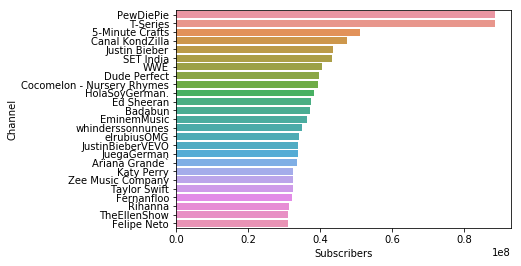

In [21]:
ax= sns.barplot(x=df["Subscribers"],y=df["Channel"])